In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:10<00:00, 92.1MB/s]
100% 1.06G/1.06G [00:11<00:00, 103MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



In [6]:
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

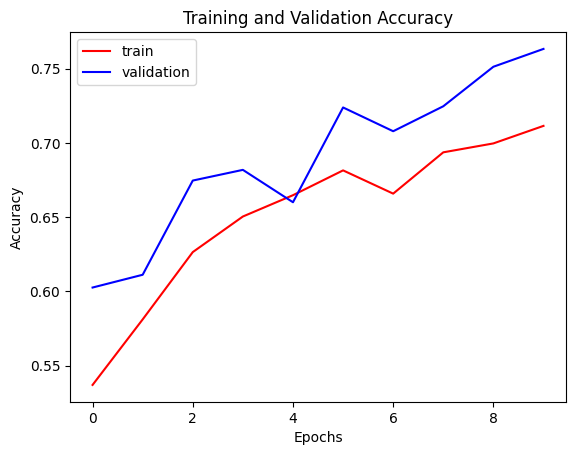

In [8]:
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()


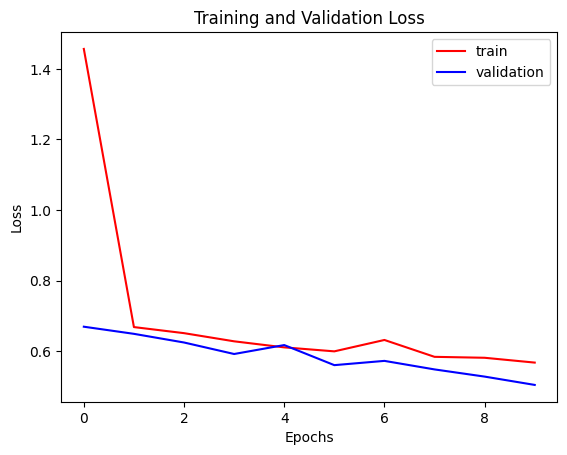

In [9]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


In [10]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


157/157 [==============================] - 13s 83ms/step - loss: 0.5043 - accuracy: 0.7632
Test Loss: 0.5043095946311951
Test Accuracy: 0.7631999850273132


In [12]:
import cv2
import numpy as np

test_img = cv2.imread('/content/test/cats/cat.10.jpg')
test_img = cv2.resize(test_img, (256, 256))
test_input = np.expand_dims(test_img / 255., axis=0)

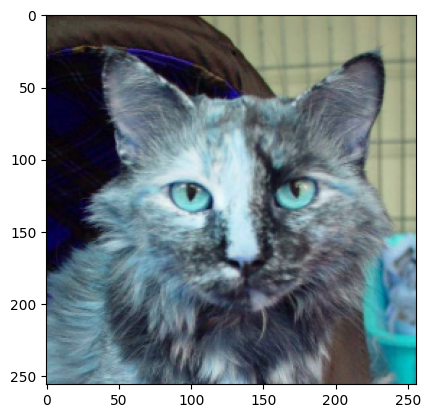

In [14]:
plt.imshow(test_img)

In [13]:
prediction = model.predict(test_input)
print("Prediction:", prediction)


1/1 [==============================] - 1s 720ms/step
Prediction: [[0.43579748]]
